In [1]:
#Importing Libraries
import torch
import torchvision
from torch import nn
import numpy as np
from torch import optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cpu



In [3]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

In [4]:
train_data= torchvision.datasets.MNIST('mnist_data',train=True, download= True, transform= T)
test_data= torchvision.datasets.MNIST('mnist_data',train=False, download= True, transform= T)

train_dl=torch.utils.data.DataLoader(train_data,shuffle=True,num_workers=4, batch_size= 128)
test_dl=torch.utils.data.DataLoader(test_data, batch_size= 128)

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw




Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


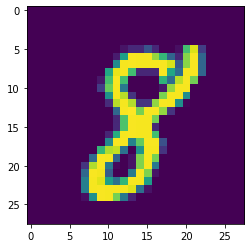

In [5]:
plt.imshow(train_data[97][0][0])

In [6]:
print('No. of samples in train set: '+str(len(train_dl.dataset)))
print('No. of samples in test set: '+str(len(test_dl.dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000


**NEURAL NETWORK**

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1= nn.Linear(784,100)
        self.fc2= nn.Linear(100,10)
        self.Sigmoid= nn.Sigmoid()

    def forward(self,x):
        x=self.fc1(x)
        x=self.Sigmoid(x)
        x=self.fc2(x)
        x=F.softmax(x,dim=1)
        print(x.size())
        return x

In [8]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (Sigmoid): Sigmoid()
)


In [9]:
params= list(net.parameters())

print('\nDimension of first layer weights:: '+str(params[0].size()))
print('Dimensions of first layer bias:: '+str(params[1].size()))
print('\nDimension of second layer weights:: '+str(params[2].size()))
print('Dimensions of second layer bias:: '+str(params[3].size()))

totalParams=0

for param in params:
    totalParams+=np.sum(np.prod(param.size()))

print('\nTotal Number of Parameters are :: '+str(totalParams))


Dimension of first layer weights:: torch.Size([100, 784])
Dimensions of first layer bias:: torch.Size([100])

Dimension of second layer weights:: torch.Size([10, 100])
Dimensions of second layer bias:: torch.Size([10])

Total Number of Parameters are :: 79510


In [10]:
for i, data in enumerate(train_dl):
    inputs, labels= data
    print(inputs.view(inputs.shape[0],-1).shape)

torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size([128, 784])
torch.Size(

In [11]:
inputs.view(-1,inputs.shape[0]).shape

torch.Size([784, 96])

In [12]:
data1= next(iter(train_dl))

In [13]:
input1, label = data1
input1.shape

torch.Size([128, 1, 28, 28])

In [14]:
label

tensor([3, 6, 3, 1, 5, 4, 5, 6, 7, 7, 1, 9, 2, 3, 5, 3, 9, 9, 2, 3, 3, 6, 5, 0,
        6, 7, 3, 8, 6, 3, 8, 9, 6, 0, 7, 8, 8, 1, 5, 3, 0, 9, 9, 8, 0, 7, 9, 2,
        2, 8, 8, 1, 2, 4, 6, 7, 6, 2, 9, 7, 1, 8, 7, 6, 0, 6, 6, 1, 5, 3, 4, 1,
        8, 7, 4, 3, 2, 0, 6, 3, 9, 0, 7, 7, 4, 5, 0, 3, 8, 4, 6, 1, 6, 3, 6, 0,
        4, 3, 6, 5, 3, 9, 3, 8, 5, 2, 9, 9, 4, 2, 5, 1, 2, 7, 3, 8, 6, 4, 3, 7,
        8, 0, 9, 0, 0, 5, 7, 2])

In [15]:
net(input1.view(input1.shape[0],-1))

torch.Size([128, 10])


tensor([[0.1492, 0.0703, 0.1085,  ..., 0.1026, 0.0918, 0.1146],
        [0.1553, 0.0711, 0.1122,  ..., 0.1035, 0.0910, 0.1118],
        [0.1488, 0.0711, 0.1090,  ..., 0.1046, 0.0911, 0.1128],
        ...,
        [0.1453, 0.0697, 0.1093,  ..., 0.1021, 0.0923, 0.1158],
        [0.1465, 0.0708, 0.1074,  ..., 0.1054, 0.0903, 0.1136],
        [0.1475, 0.0700, 0.1092,  ..., 0.1005, 0.0907, 0.1164]],
       grad_fn=<SoftmaxBackward>)

**CNN MODEL (LENET)**

In [16]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()

        self.conv1=nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool1=nn.MaxPool2d(kernel_size=2,stride=2)

        self.conv2= nn.Conv2d(6,16,5)
        self.pool2= nn.MaxPool2d(kernel_size=2,stride=2)

        self.fc1= nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)

    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool1(x)
        x=F.relu(self.conv2(x))
        x=self.pool2(x)

        x=x.view(-1,400)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)

        return x.softmax(x,dim=1)


In [17]:
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [18]:
params= list(net.named_parameters())

print('Number of parameters :: '+str(len(params))+'\n')

totalParams=0

for name, param in params:
    print(name, '---->',param.shape)
    totalParams+=np.sum(np.prod(param.size()))

print('\nTotal Number of Parameters are :: '+str(totalParams))

Number of parameters :: 10

conv1.weight ----> torch.Size([6, 1, 5, 5])
conv1.bias ----> torch.Size([6])
conv2.weight ----> torch.Size([16, 6, 5, 5])
conv2.bias ----> torch.Size([16])
fc1.weight ----> torch.Size([120, 400])
fc1.bias ----> torch.Size([120])
fc2.weight ----> torch.Size([84, 120])
fc2.bias ----> torch.Size([84])
fc3.weight ----> torch.Size([10, 84])
fc3.bias ----> torch.Size([10])

Total Number of Parameters are :: 61706


In [19]:
#Transforming and Resizing image
apply_transform = torchvision.transforms.Compose([torchvision.transforms.Resize(32),
    torchvision.transforms.ToTensor()
])

In [20]:
train_data= torchvision.datasets.MNIST('mnist_data',train=True, download= False, transform= apply_transform)
test_data= torchvision.datasets.MNIST('mnist_data',train=False, download= False, transform= apply_transform)

train_dl=torch.utils.data.DataLoader(train_data,shuffle=True,num_workers=4, batch_size= 64)
test_dl=torch.utils.data.DataLoader(test_data, batch_size= 64)

In [21]:
 for i, data in enumerate(train_dl):
    inputs, labels= data
    #print(inputs.view(inputs.shape[0],-1).shape)
    print(inputs.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 3

In [22]:
data1= next(iter(train_dl))
input1, label = data1
input1.shape

torch.Size([64, 1, 32, 32])

In [23]:
label

tensor([7, 1, 1, 2, 3, 1, 7, 5, 2, 1, 7, 6, 2, 2, 4, 3, 4, 1, 7, 9, 8, 6, 4, 3,
        8, 5, 2, 1, 7, 0, 4, 6, 3, 0, 7, 8, 9, 9, 3, 2, 4, 9, 3, 3, 7, 8, 1, 0,
        3, 7, 7, 7, 4, 2, 6, 8, 8, 6, 7, 5, 1, 1, 3, 3])